NetworkX 主要不是一个图形绘图包，而是包含使用 Matplotlib 的基本绘图以及使用开源 Graphviz 软件包的接口。

In [1]:
import matplotlib.pyplot as plt
import networkx as nx

如何画一个多层感知机  某种神经网络图

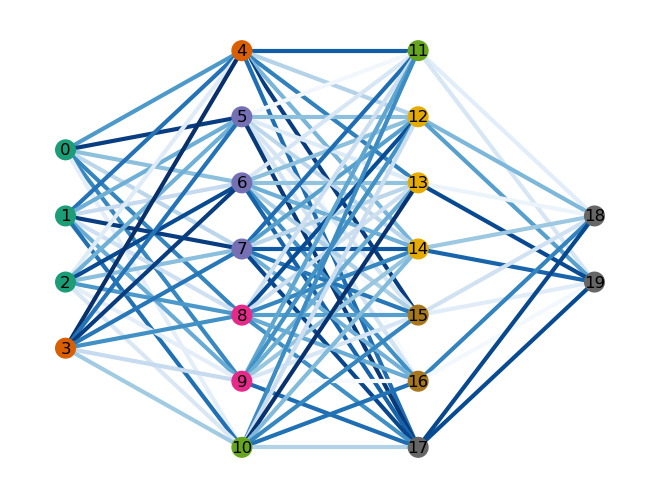

In [2]:
left, right, bottom, top = .1, .9, .1, .9 # 表示相对位置的百分比
# 网络离上下左右的距离
layer_sizes = [4, 7, 7, 2]
# layter_sizes可以自己调整 你明白为什么要到处打空格了吗 每一层的节点个数
import random
G = nx.Graph()
v_spacing = (top - bottom)/float(max(layer_sizes))
h_spacing = (right - left)/float(len(layer_sizes) - 1)
node_count = 0
for i, v in enumerate(layer_sizes):
    layer_top = v_spacing*(v-1)/2. + (top + bottom)/2.
    for j in range(v):
        G.add_node(node_count, pos=(left + i*h_spacing, layer_top - j*v_spacing))
        node_count += 1
# 这上面的数字调整我想了好半天，汗
for x, (left_nodes, right_nodes) in enumerate(zip(layer_sizes[:-1], layer_sizes[1:])):
    for i in range(left_nodes):
        for j in range(right_nodes):
            G.add_edge(i+sum(layer_sizes[:x]), j+sum(layer_sizes[:x+1]))    
# 慢慢研究吧
pos=nx.get_node_attributes(G,'pos')
# 把每个节点中的位置pos信息导出来
nx.draw(G, pos, 
        node_color=range(node_count), 
        with_labels=True,
        node_size=200, 
        edge_color=[random.random() for i in range(len(G.edges))], 
        width=3, 
        cmap=plt.cm.Dark2, # matplotlib的调色板，可以搜搜，很多颜色呢
        edge_cmap=plt.cm.Blues
       )
plt.show() 

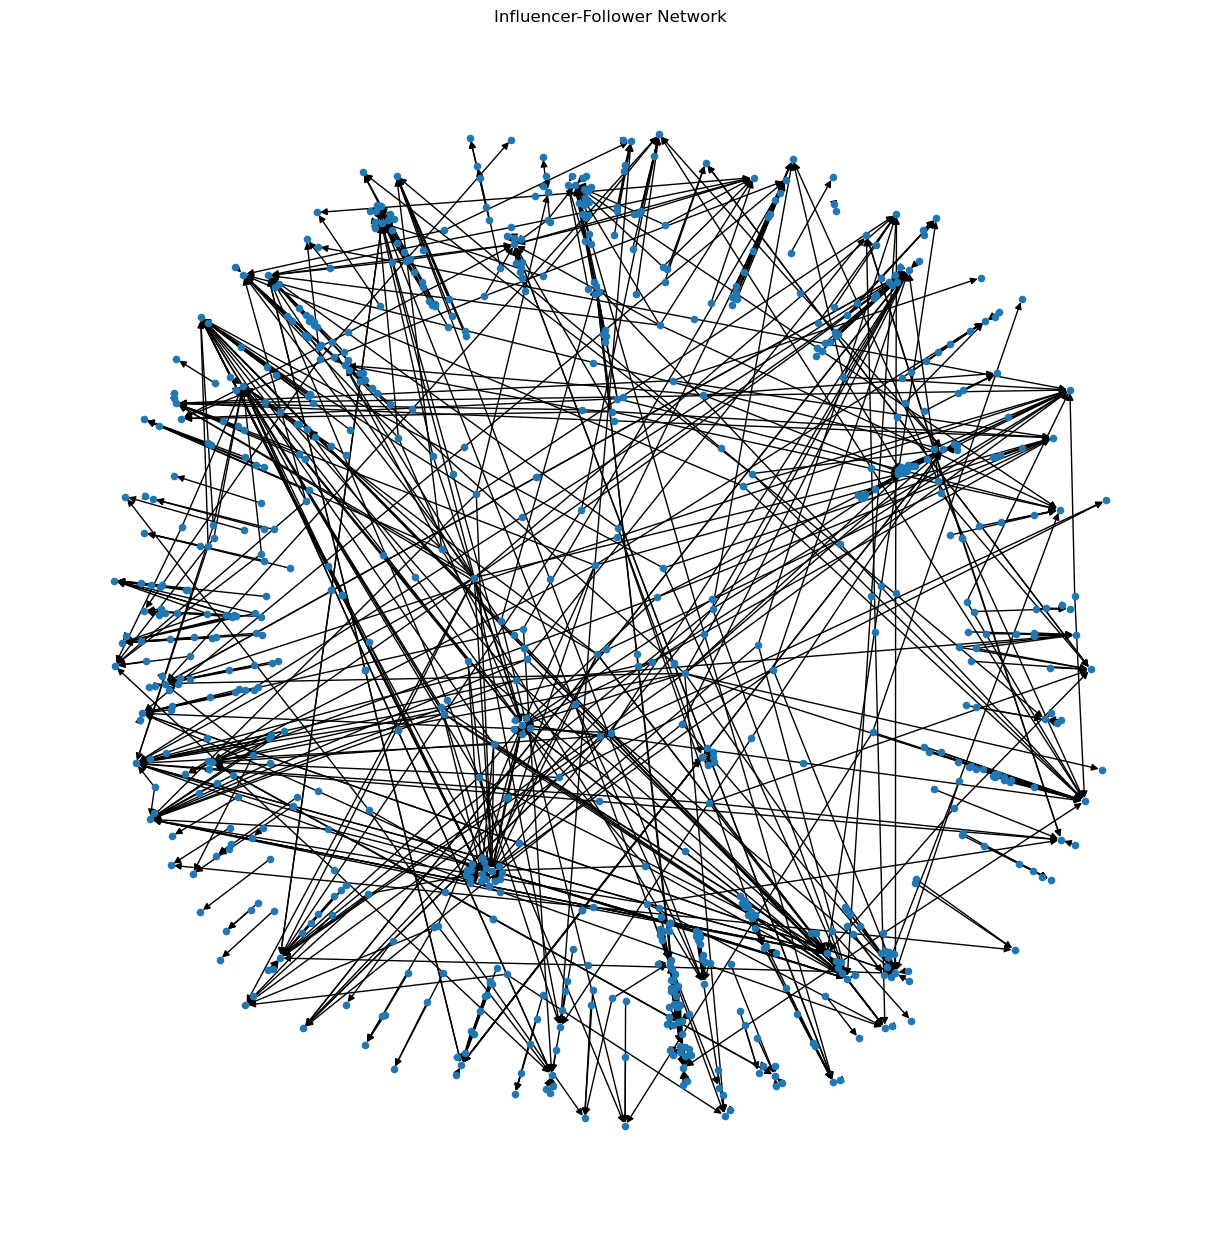

In [3]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import scipy # scipys 建立在numpy基础上的更高级的计算库

# 读取CSV文件
file_path = 'F:/about/数学建模/model/美赛2021/2021_ICM_Problem_D_Data/influence_data.csv'  # 替换为你的CSV文件路径
data = pd.read_csv(file_path, nrows=1000)
# Create a directed graph
G = nx.DiGraph()

# Add edges from the dataset (each edge is a pair of influencer-follower)
for _, row in data.iterrows():
    G.add_edge(row['influencer_name'], row['follower_name'], 
               influencer_genre=row['influencer_main_genre'],
               follower_genre=row['follower_main_genre'])

# Basic visualization of the graph
plt.figure(figsize=(12, 12))
nx.draw(G, with_labels=False, node_size=20, arrows=True)
plt.title("Influencer-Follower Network")
plt.show()
